In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import style
style.use('dark_background')

from rdkit.Chem import AllChem as Chem
from rdkit.Chem import Crippen

df = pd.read_csv('layouts.csv', index_col=0)
df

,Item Name,CatalogNumber,SMILES,Rack Number,Plate Location
0,Axitinib,S1005,CNC(=O)C1=CC=CC=C1SC1=CC2=C(C=C1)C(\C=C\C1=CC=...,L1300-01,a1
1,Afatinib (BIBW2992),S1011,CN(C)C\C=C\C(=O)NC1=CC2=C(NC3=CC=C(F)C(Cl)=C3)...,L1300-01,b1
2,Bortezomib (Velcade),S1013,CC(C)C[C@H](NC(=O)[C@H](CC1=CC=CC=C1)NC(=O)C1=...,L1300-01,c1
3,Bosutinib (SKI-606),S1014,COC1=C(Cl)C=C(Cl)C(NC2=C(C=NC3=CC(OCCCN4CCN(C)...,L1300-01,d1
4,Dasatinib (BMS-354825),S1021,CC1=NC(NC2=NC=C(S2)C(=O)NC2=C(Cl)C=CC=C2C)=CC(...,L1300-01,e1
...,...,...,...,...,...
973,Trimipramine Maleate,S4416,OC(=O)\C=C/C(O)=O.CC(CN(C)C)CN1C2=CC=CC=C2CCC2...,L1300-12,f1
974,Vinblastine sulfate,S4505,OS(O)(=O)=O.[H][C@@]12N3CCC11C4=CC(=C(OC)C=C4N...,L1300-12,g1
975,Tofacitinib citrate (CP-690550 citrate),S5001,OC(=O)CC(O)(CC(O)=O)C(O)=O.C[C@@H]1CCN(C[C@@H]...,L1300-12,h1
976,FK-506 (Tacrolimus),S5003,[H][C@]12O[C@](O)([C@H](C)C[C@@H]1OC)C(=O)C(=O...,L1300-12,a2


In [11]:
df['mols'] = df.SMILES.apply(Chem.MolFromSmiles)
df['molsH'] = df['mols'].apply(Chem.AddHs)
df.head()

,Item Name,CatalogNumber,SMILES,Rack Number,Plate Location,mols,molsH
0,Axitinib,S1005,CNC(=O)C1=CC=CC=C1SC1=CC2=C(C=C1)C(\C=C\C1=CC=...,L1300-01,a1,<rdkit.Chem.rdchem.Mol object at 0x7f2808df2170>,<rdkit.Chem.rdchem.Mol object at 0x7f2808ce5e40>
1,Afatinib (BIBW2992),S1011,CN(C)C\C=C\C(=O)NC1=CC2=C(NC3=CC=C(F)C(Cl)=C3)...,L1300-01,b1,<rdkit.Chem.rdchem.Mol object at 0x7f2808dddd50>,<rdkit.Chem.rdchem.Mol object at 0x7f2808ce5df0>
2,Bortezomib (Velcade),S1013,CC(C)C[C@H](NC(=O)[C@H](CC1=CC=CC=C1)NC(=O)C1=...,L1300-01,c1,<rdkit.Chem.rdchem.Mol object at 0x7f2808dda440>,<rdkit.Chem.rdchem.Mol object at 0x7f2808ce5da0>
3,Bosutinib (SKI-606),S1014,COC1=C(Cl)C=C(Cl)C(NC2=C(C=NC3=CC(OCCCN4CCN(C)...,L1300-01,d1,<rdkit.Chem.rdchem.Mol object at 0x7f2808e10b20>,<rdkit.Chem.rdchem.Mol object at 0x7f2808ce5f30>
4,Dasatinib (BMS-354825),S1021,CC1=NC(NC2=NC=C(S2)C(=O)NC2=C(Cl)C=CC=C2C)=CC(...,L1300-01,e1,<rdkit.Chem.rdchem.Mol object at 0x7f2809411990>,<rdkit.Chem.rdchem.Mol object at 0x7f2809096e40>


In [18]:
m = df.mols[0]
l = [i for i in Chem.__dict__ if 'Calc' in i]
fn = lambda fn, mol : Chem.__dict__[fn](mol)
props = []
for i in l:
    try:
        fn(i, m)
        props.append(i)
    except:
        pass

print(len(l))
print(len(props))

64
43


RDKit ERROR: Violation occurred on line 177 in file /opt/conda/conda-bld/rdkit_1603173682698/work/Code/GraphMol/Descriptors/PMI.cpp
RDKit ERROR: Failed Expression: mol.getNumConformers() >= 1
RDKit ERROR: ****
RDKit ERROR: 
tors/PMI.cpp
Failed Expression: mol.getNumConformers() >= 1
****

[12:48:35] 

****
Pre-condition Violation
molecule has no conformers
Violation occurred on line 192 in file /opt/conda/conda-bld/rdkit_1603173682698/work/Code/GraphMol/Descriptors/PMI.cpp
Failed Expression: mol.getNumConformers() >= 1
****

[12:48:35] 

****
Pre-condition Violation
molecule has no conformers
Violation occurred on line 208 in file /opt/conda/conda-bld/rdkit_1603173682698/work/Code/GraphMol/Descriptors/PMI.cpp
Failed Expression: mol.getNumConformers() >= 1
****

[12:48:35] 

****
Pre-condition Violation
molecule has no conformers
Violation occurred on line 226 in file /opt/conda/conda-bld/rdkit_1603173682698/work/Code/GraphMol/Descriptors/PMI.cpp
Failed Expression: mol.getNumConformers(

In [20]:
for i in props:
    try:
        df[i.replace('Calc','')] = df.molsH.apply(lambda m : fn(i, m))
    except:
        pass
    
df['LogP'] = df.molsH.apply(Crippen.MolLogP)
print(df.columns)
df.head()

Index(['Item Name', 'CatalogNumber', 'SMILES', 'Rack Number', 'Plate Location',
       'mols', 'molsH', 'CrippenDescriptors', 'LabuteASA', 'TPSA',
       'ExactMolWt', 'MolFormula', 'NumLipinskiHBD', 'NumLipinskiHBA',
       'NumHBD', 'NumHBA', 'NumRotatableBonds', 'NumRings', 'NumAromaticRings',
       'NumSaturatedRings', 'NumHeterocycles', 'NumAromaticHeterocycles',
       'NumAromaticCarbocycles', 'NumSaturatedHeterocycles',
       'NumSaturatedCarbocycles', 'NumAliphaticRings',
       'NumAliphaticHeterocycles', 'NumAliphaticCarbocycles', 'NumHeteroatoms',
       'NumAmideBonds', 'FractionCSP3', 'Chi0v', 'Chi1v', 'Chi2v', 'Chi3v',
       'Chi4v', 'Chi0n', 'Chi1n', 'Chi2n', 'Chi3n', 'Chi4n', 'HallKierAlpha',
       'Kappa1', 'Kappa2', 'Kappa3', 'NumSpiroAtoms', 'NumBridgeheadAtoms',
       'AUTOCORR2D', 'LogP'],
      dtype='object')


,Item Name,CatalogNumber,SMILES,Rack Number,Plate Location,mols,molsH,CrippenDescriptors,LabuteASA,TPSA,...,Chi3n,Chi4n,HallKierAlpha,Kappa1,Kappa2,Kappa3,NumSpiroAtoms,NumBridgeheadAtoms,AUTOCORR2D,LogP
0,Axitinib,S1005,CNC(=O)C1=CC=CC=C1SC1=CC2=C(C=C1)C(\C=C\C1=CC=...,L1300-01,a1,<rdkit.Chem.rdchem.Mol object at 0x7f2808df2170>,<rdkit.Chem.rdchem.Mol object at 0x7f2808ce5e40>,"(4.639100000000004, 113.21390000000004)",191.854408,70.67,...,3.195510,2.008575,-3.380000,6.599899,8.102901,3.818584,0,0,"[3.653, 4.009, 4.064, 4.008, 3.869, 3.799, 3.7...",4.63910
1,Afatinib (BIBW2992),S1011,CN(C)C\C=C\C(=O)NC1=CC2=C(NC3=CC=C(F)C(Cl)=C3)...,L1300-01,b1,<rdkit.Chem.rdchem.Mol object at 0x7f2808dddd50>,<rdkit.Chem.rdchem.Mol object at 0x7f2808ce5df0>,"(4.389900000000002, 130.4064)",236.520793,88.61,...,3.511664,2.226299,-3.270000,7.874670,10.771676,5.990027,0,0,"[3.832, 4.197, 4.274, 4.165, 4.213, 4.295, 4.3...",4.38990
2,Bortezomib (Velcade),S1013,CC(C)C[C@H](NC(=O)[C@H](CC1=CC=CC=C1)NC(=O)C1=...,L1300-01,c1,<rdkit.Chem.rdchem.Mol object at 0x7f2808dda440>,<rdkit.Chem.rdchem.Mol object at 0x7f2808ce5da0>,"(0.36059999999999964, 105.00950000000005)",199.529829,124.44,...,2.495641,1.452086,-2.775065,5.641472,10.531039,6.750183,0,0,"[3.54, 3.865, 3.933, 3.924, 4.059, 4.016, 3.98...",0.36060
3,Bosutinib (SKI-606),S1014,COC1=C(Cl)C=C(Cl)C(NC2=C(C=NC3=CC(OCCCN4CCN(C)...,L1300-01,d1,<rdkit.Chem.rdchem.Mol object at 0x7f2808e10b20>,<rdkit.Chem.rdchem.Mol object at 0x7f2808ce5f30>,"(5.1903800000000055, 143.35569999999984)",261.609820,82.88,...,3.983870,2.490573,-2.960000,8.017962,11.849898,5.876517,0,0,"[3.916, 4.276, 4.462, 4.438, 4.323, 4.381, 4.3...",5.19038
4,Dasatinib (BMS-354825),S1021,CC1=NC(NC2=NC=C(S2)C(=O)NC2=C(Cl)C=CC=C2C)=CC(...,L1300-01,e1,<rdkit.Chem.rdchem.Mol object at 0x7f2809411990>,<rdkit.Chem.rdchem.Mol object at 0x7f2809096e40>,"(3.3135400000000015, 132.04670000000002)",237.733977,106.51,...,3.423708,2.103214,-2.790000,7.352308,10.429650,5.772233,0,0,"[3.868, 4.273, 4.314, 4.28, 4.247, 4.3, 4.105,...",3.31354


In [23]:
ls

data.ipynb  layouts.csv  mol-props.csv


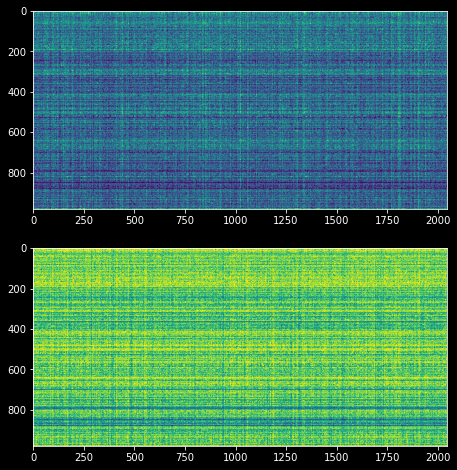

In [26]:
fps = np.array(list(map(Chem.RDKFingerprint, df.mols)))
fpsH = np.array(list(map(Chem.RDKFingerprint, df.molsH)))

fig, ax = plt.subplots(2,1, figsize=(8,8))
ax[0].imshow(fps)
ax[1].imshow(fpsH)
plt.show()

In [34]:
import umap

reducer = umap.UMAP(n_neighbors=15,
                    n_components=2,
                    metric='manhattan',
                    metric_kwds=None,
                    output_metric='manhattan',
                    n_epochs=None,
                    learning_rate=1.0,
                    init='spectral',
                    min_dist=0.1,
                    spread=1.0,
                    low_memory=True,
                    n_jobs=-1,
                    set_op_mix_ratio=1.0,
                    local_connectivity=1.0,
                    repulsion_strength=1.0,
                    negative_sample_rate=5,
                    transform_queue_size=4.0,
                    angular_rp_forest=False,
                    target_n_neighbors=-1,
                    target_metric='categorical',
                    target_metric_kwds=None,
                    target_weight=0.5,
                    transform_seed=42,
                    transform_mode='embedding',
                    force_approximation_algorithm=False,
                    verbose=True,
                    tqdm_kwds=None,
                    unique=False,
                    densmap=False,
                    dens_lambda=2.0,
                    dens_frac=0.3,
                    dens_var_shift=0.1,
                    output_dens=False,
                    disconnection_distance=None,
                    precomputed_knn=(None, None, None),
                )

fps_umap = reducer.fit_transform(fps)

UMAP(metric='manhattan', output_metric='manhattan', verbose=True)
Sun Feb 20 12:58:20 2022 Construct fuzzy simplicial set


OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


Sun Feb 20 12:58:22 2022 Finding Nearest Neighbors
Sun Feb 20 12:58:24 2022 Finished Nearest Neighbor Search
Sun Feb 20 12:58:25 2022 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

Sun Feb 20 12:58:29 2022 Finished embedding


In [40]:
cols = ['Item Name', 'CatalogNumber', 'SMILES', 'Rack Number', 'Plate Location',
       'CrippenDescriptors', 'LabuteASA', 'TPSA',
       'ExactMolWt', 'MolFormula', 'NumLipinskiHBD', 'NumLipinskiHBA',
       'NumHBD', 'NumHBA', 'NumRotatableBonds', 'NumRings', 'NumAromaticRings',
       'NumSaturatedRings', 'NumHeterocycles', 'NumAromaticHeterocycles',
       'NumAromaticCarbocycles', 'NumSaturatedHeterocycles',
       'NumSaturatedCarbocycles', 'NumAliphaticRings',
       'NumAliphaticHeterocycles', 'NumAliphaticCarbocycles', 'NumHeteroatoms',
       'NumAmideBonds', 'FractionCSP3', 'Chi0v', 'Chi1v', 'Chi2v', 'Chi3v',
       'Chi4v', 'Chi0n', 'Chi1n', 'Chi2n', 'Chi3n', 'Chi4n', 'HallKierAlpha',
       'Kappa1', 'Kappa2', 'Kappa3', 'NumSpiroAtoms', 'NumBridgeheadAtoms',
       'LogP']
df_ = df.loc[:, cols]
df_ = pd.concat(
    [df_,pd.DataFrame(fps_umap, columns=['x','y'])],
          axis=1)
df_.to_csv('mol-props.csv', index=False)

In [43]:
reducer3d = umap.UMAP(n_neighbors=15,
                    n_components=3,
                    metric='manhattan',
                    output_metric='manhattan',
                    low_memory=True,
                    verbose=True,
                )

fps_umap3d = reducer3d.fit_transform(fps)

UMAP(metric='manhattan', n_components=3, output_metric='manhattan', verbose=True)
Sun Feb 20 14:23:51 2022 Construct fuzzy simplicial set
Sun Feb 20 14:23:53 2022 Finding Nearest Neighbors
Sun Feb 20 14:23:53 2022 Finished Nearest Neighbor Search
Sun Feb 20 14:23:53 2022 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

Sun Feb 20 14:23:56 2022 Finished embedding


In [46]:
df3d = df_.drop(['x','y'], axis=1)
df3d = pd.concat([df3d, pd.DataFrame(fps_umap3d, columns=list('xyz'))],
                 axis=1)
df3d.head()

,Item Name,CatalogNumber,SMILES,Rack Number,Plate Location,CrippenDescriptors,LabuteASA,TPSA,ExactMolWt,MolFormula,...,HallKierAlpha,Kappa1,Kappa2,Kappa3,NumSpiroAtoms,NumBridgeheadAtoms,LogP,x,y,z
0,Axitinib,S1005,CNC(=O)C1=CC=CC=C1SC1=CC2=C(C=C1)C(\C=C\C1=CC=...,L1300-01,a1,"(4.639100000000004, 113.21390000000004)",191.854408,70.67,386.120132,C22H18N4OS,...,-3.380000,6.599899,8.102901,3.818584,0,0,4.63910,9.692579,6.001500,0.272903
1,Afatinib (BIBW2992),S1011,CN(C)C\C=C\C(=O)NC1=CC2=C(NC3=CC=C(F)C(Cl)=C3)...,L1300-01,b1,"(4.389900000000002, 130.4064)",236.520793,88.61,485.162996,C24H25ClFN5O3,...,-3.270000,7.874670,10.771676,5.990027,0,0,4.38990,10.139619,6.622851,1.778794
2,Bortezomib (Velcade),S1013,CC(C)C[C@H](NC(=O)[C@H](CC1=CC=CC=C1)NC(=O)C1=...,L1300-01,c1,"(0.36059999999999964, 105.00950000000005)",199.529829,124.44,384.196886,C19H25BN4O4,...,-2.775065,5.641472,10.531039,6.750183,0,0,0.36060,8.343521,4.938880,0.334249
3,Bosutinib (SKI-606),S1014,COC1=C(Cl)C=C(Cl)C(NC2=C(C=NC3=CC(OCCCN4CCN(C)...,L1300-01,d1,"(5.1903800000000055, 143.35569999999984)",261.609820,82.88,529.164745,C26H29Cl2N5O3,...,-2.960000,8.017962,11.849898,5.876517,0,0,5.19038,10.100463,6.574202,1.816241
4,Dasatinib (BMS-354825),S1021,CC1=NC(NC2=NC=C(S2)C(=O)NC2=C(Cl)C=CC=C2C)=CC(...,L1300-01,e1,"(3.3135400000000015, 132.04670000000002)",237.733977,106.51,487.155722,C22H26ClN7O2S,...,-2.790000,7.352308,10.429650,5.772233,0,0,3.31354,9.343367,5.672575,1.345376


In [66]:
import os
import os.path as osp
from rdkit.Chem import Draw
from tqdm.notebook import tqdm

if not osp.exists('img'):
    os.mkdir('img')

paths = []
for i,j in tqdm(zip(df['Item Name'], df['mols']),total=len(df)):
    path =  osp.join('img', 
                     i.lower().\
                     replace(' ','-').\
                     replace('(','').\
                     replace(')','')\
                     + '.png')
    paths.append(path)
    Draw.MolToFile(j,
                   path,
                   size=(300, 300),
                   kekulize=True,
                   wedgeBonds=True,
                   imageType='png',
                   fitImage=False,
                   options=None,
                  )
df3d['img'] = paths
df3d.to_csv('mol-props-3d.csv', index=False)

  0%|          | 0/978 [00:00<?, ?it/s]

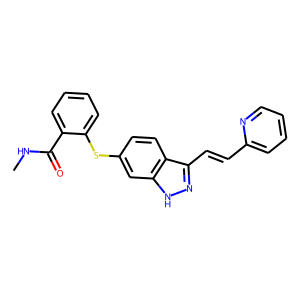

In [70]:
from PIL import Image

Image.open(paths[0])